In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

## Bayesian decision theory와 Classification (분류)

#### Bayes' rule

## $P( \omega_j | \mathbf{x} ) = \frac{p(\mathbf{x} | \omega_j) P(\omega_j)}{p(\mathbf{x})} = \frac{p(\mathbf{x} | \omega_j) P(\omega_j)}{\sum_{k}{p(\mathbf{x}|\omega_k)P(\omega_k)}}$

Bayesian decision theory는 분류(classification) 문제에 있어서 에러의 확률 $P(error) = \int{p(error, \mathbf{x}) d\mathbf{x}} = \int{p(error | \mathbf{x}) p(\mathbf{x}) d\mathbf{x}}$ 을 낮추기 위해서 어떤 선택을 해야되는지에 대한 확률적인 해법을 제시한다. 이를 위해 가장 큰 Posteriori prob.를 가진 $j$를 선택한다.

### [Exercise 1] Naive Bayes with 1D Gaussian distribution

모든 클래스의 priori prob.가 동등하면, $P(\omega_1)=P(\omega_2)=...=P(\omega_N)$ 이므로, $p(\mathbf{x} | \omega_j)$만 비교하면 된다. 
Decision boundary 그리기에 익숙해지기 위해 Exercise 1에서는 모든 클래스의 priori prob.가 같다고 가정한다.

1차원 정규 분포 함수 
- $f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{ -\frac{(x-\mu)^2}{2 \sigma^2}} $ 

In [38]:
# probability density function for 1D gaussian distribution
def gaussian_pdf(x, mu, sigma):
    # implement here
    x_whitened = (x-mu)/sigma
    return (np.exp(-(x_whitened**2)/2))/(np.sqrt(2*np.pi)*sigma)

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 1)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 1)$

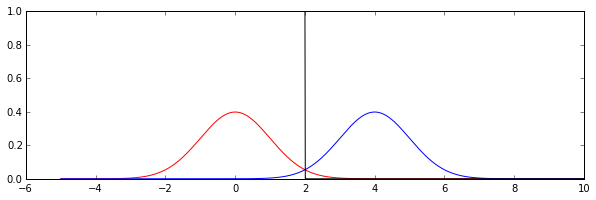

In [39]:
xMin = -5
xMax = 10
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 1

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')
plt.show()

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 3)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 3)$

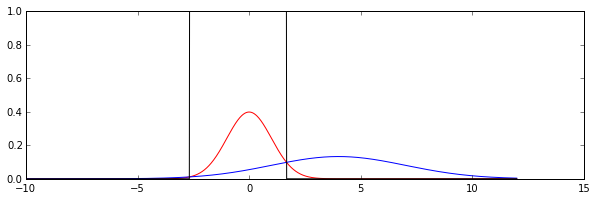

In [40]:
xMin = -10
xMax = 12
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 3

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')

plt.show()

### [Exercise 2] Multivariate Normal distribution의 covariance의 형태에 따른 decision boundary의 모양

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x\\ y \end{bmatrix}) = \frac{1}{2\pi \sqrt{(\Sigma_{11} \Sigma_{22} - \Sigma_{12} \Sigma_{21})}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x - \mu_1 & y - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix}x - \mu_1 \\ y - \mu_2 \end{bmatrix} \right)$

### Discriminant Functions for the Normal Density

###  $p(\mathbf{x}|w_i)=\frac{1}{(2\pi)^\frac{d}{2} |\boldsymbol\Sigma_i|^\frac{1}{2}} e^{-\frac{1}{2} (\mathbf{x} -\boldsymbol{\mu}_i)^T \boldsymbol\Sigma_i^{-1} (\mathbf{x} -\boldsymbol{\mu}_i)}$
### $g_i(\mathbf{x}) = \ln p(\mathbf{x}|w_i) + \ln P(w_i)$


## case 1 :  $\boldsymbol\Sigma = \sigma^2\mathbf{I}$
### $g_i(\mathbf{x}) = -\frac{1}{2\sigma^2} \| \mathbf{x}-\boldsymbol{\mu_i} \| ^2 + \ln P(w_i)$
### $g_i(\mathbf{x}) = \mathbf{w}_i^T\mathbf{x} + w_{i0}$
### decision boundary =  {$\mathbf{x} | \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0$}
### - $\mathbf{w} = \boldsymbol{\mu_i}-\boldsymbol{\mu_j}$
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) - \frac{\sigma^2}{\|\boldsymbol{\mu_i}-\boldsymbol{\mu_j}\|^2} \ln \frac{ P(w_i)}{P(w_j)} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$
#### $P(w_i)=P(w_j)$ 라고 가정하면,
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) $


In [112]:
def visualize_decision_boundary(mu1, mu2, cov1, cov2):
    # use 'plt.matshow'
    from scipy.stats import multivariate_normal

    var1 = multivariate_normal(mean=mu1, cov=cov1)
    var2 = multivariate_normal(mean=mu2, cov=cov2)

    minVal   = -10
    maxVal   = 10
    stepSize = 0.05
    xAxisVal = np.arange(minVal, maxVal, stepSize)
    yAxisVal = np.arange(minVal, maxVal, stepSize)
    xx, yy = np.meshgrid(xAxisVal, yAxisVal)

    
    surfvar1 = plt.contour(xx,yy,var1.pdf(np.stack([xx,yy],2)))  
    surfvar2 = plt.contour(xx,yy,var2.pdf(np.stack([xx,yy],2)))  
    surf = plt.contour(xx,yy,var1.pdf(np.stack([xx,yy], 2))>var2.pdf(np.stack([xx,yy], 2)))
    
    
    surfg = plt.plot(xAxisVal, g(xAxisVal, mu1,mu2,cov1), '--')
    plt.colorbar(shrink=0.5, aspect=3)

### (1) $\Sigma_i = \sigma^2 I$ Identity Matrix에 상수가 곱해져있는 형태 ($P(w_i)=P(w_j)$가정)

### decision boundary를 그리는 함수
### - $ \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0 \rightarrow y=a*x+b$ 이 형태로 바꾸어서 plot

$ \begin{bmatrix}w_0\\ w_1 \end{bmatrix}^T(\begin{bmatrix}x\\ y \end{bmatrix}-\begin{bmatrix}x_{00}\\ x_{01} \end{bmatrix})= w_0(x-x_{00}) + w_1(y-x_{01})=0$

$(y-x_{01})=-w_0/w_1(x-x_{00})$

$y=-w_0/w_1x+w_0x_{00}/w_1  + x_{01}$


In [59]:
def g(xx, mu1, mu2, sigma):
  # create decision boundary
  w = (mu1-mu2)
  x0 = (mu1+mu2)/2

  a = -w[0]/w[1]
  b = w[0]*x0[0]/w[1]+x0[1]  
  return  a*xx + b

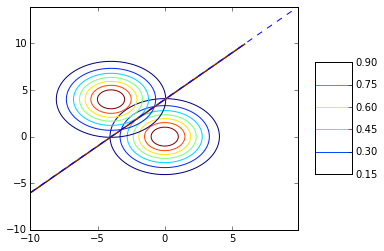

In [105]:
mu1 = np.array([0,0])
mu2 = np.array([-4,4])
sigma = 2
cov = (sigma*sigma) * np.eye(2) # Identity matrix

visualize_decision_boundary(mu1, mu2, cov, cov)

#### (2) $\Sigma_i = \Sigma$

## case 2 :  $\boldsymbol\Sigma_i = \Sigma$
### $g_i(\mathbf{x}) = -\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu_i})^T \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu_i}) + \ln P(w_i)$
### decision boundary =  {$\mathbf{x} | \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0$}
### - $\mathbf{w} = \Sigma^{-1}(\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) - \frac{1}{(\boldsymbol{\mu_i}-\boldsymbol{\mu_j})^T \Sigma^{-1} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})} \ln \frac{ P(w_i)}{P(w_j)} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$

np.linalg.inv : inverse matrix를 만들어주는 함수
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html

In [109]:
def g(xx, mu1, mu2, Sigma):
  # create decision boundary
  iSigma = np.linalg.inv(Sigma)
      
  submuij = mu1-mu2
  summuij = mu1+mu2
  invsubmuij = np.matmul(submuij, iSigma)
    
  a = -invsubmuij[0]/invsubmuij[1]
  b = np.dot(invsubmuij,summuij)/(2*invsubmuij[1]) 
  return  a*xx + b

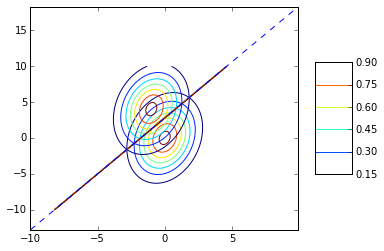

In [107]:
mu1 = np.array([0,0])
mu2 = np.array([-1,4])
cov = np.array([[2, 1], [1, 10]])

visualize_decision_boundary(mu1, mu2, cov, cov)

#### (3) $\Sigma_i = $ arbitrary (positive-semi definite matrix)

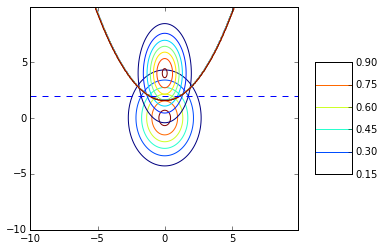

In [110]:
mu1 = np.array([0,0])
mu2 = np.array([0,4])
cov1 = np.array([[2, 1], [0, 5]])
cov2 = np.array([[1, 0], [0, 5]])

visualize_decision_boundary(mu1, mu2, cov1, cov2)

### [Exercise 3] Salmon, Bass Classification

물고기의 길이 $x_0$가 주어졌을 때, 연어와 농어를 구분해보자.

100개의 물고기 중 30마리는 연어였고, 70마리는 농어였다.

$P(x_0|\omega_1) \sim \mathcal{N}(\mu = 60, \sigma = 2)$

$P(x_0|\omega_2) \sim \mathcal{N}(\mu = 50, \sigma = 4)$

연어($\omega_1$)의 길이와 농어($\omega_2$)의 길이는 위 정규분포를 따른다고 할 때,
Exercise 1과 같이 그래프를 그리고, Decision boundary를 나타내시오.

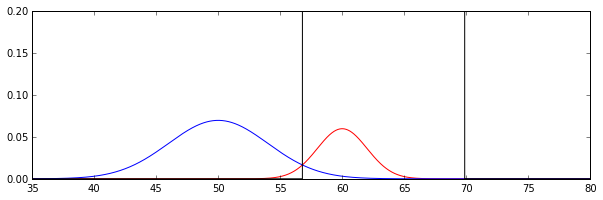

In [111]:
# Exercise 1을 참고하여 작성하세요.

xMin = 35
xMax = 80
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 60
sigma1 = 2

mu2 = 50
sigma2 = 4

pdf1 = gaussian_pdf(xVal, mu1, sigma1)*3/10
pdf2 = gaussian_pdf(xVal, mu2, sigma2)*7/10

plt.figure(figsize=(10,3))
plt.ylim(0,0.2)
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')
plt.show()

위에서 구한 물고기의 길이$x_0$에 추가로 무게 $x_1$이 주어졌을 때, 연어와 농어를 구분해보자.

100개의 물고기 중 50마리는 연어였고, 50마리는 농어였다.

$P(x_1|\omega_1) \sim \mathcal{N}(\mu = 40, \sigma = 5)$

$P(x_1|\omega_2) \sim \mathcal{N}(\mu = 40, \sigma = 2)$

연어($\omega_1$)의 무게와 농어($\omega_2$)의 무게는 위 정규분포를 따른다고 할 때,
Exercise 2과 같이 그래프를 그리고, Decision boundary를 나타내시오.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in add


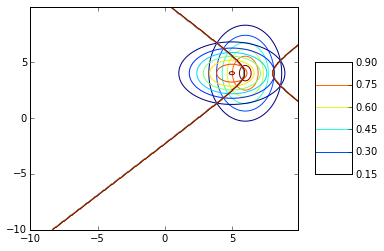

In [94]:
# Exercise 2를 참고하여 작성하세요.

mu1 = np.array([6, 4])
mu2 = np.array([5, 4])
cov1 = np.array([[2, 0], [0, 5]])
cov2 = np.array([[4, 0], [0, 2]])

visualize_decision_boundary(mu1, mu2, cov1, cov2)